In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', 23) #ver todas las columnas
pd.set_option('display.max_rows', 50) #como mucho ver 50 filas

In [3]:
''' + Sólo 8 atributos son comunes a todos los valores
    + Se podrían renombrar varias columnas
    + Podria cambiarse el orden de algunas columnas
'''

df.info() #42 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [4]:
''' + id, antiguedad, habitaciones, garages, banos, metroscubiertos, metrostotales, idzonas y precio pueden ser int
    + gimnasio, usosmultiples, piscina, escuelascercanas, centroscomercialescercanos pueden ser bool
    + fecha se puede pasar a datetime
    + tipodepropiedad, ciudad y provincia podrían ser categorías
'''

df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+06
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,0.000000,0.000000,0.000000,1.000000,1.000000,3.390000e+06
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.000000,1.000000,1.000000,1.000000,1.000000,1.252500e+07


In [5]:
''' Hay todo tipo de datos incorrectos
'''

df['direccion'].to_frame()

,direccion
0,Avenida Division del Norte 2005
1,AV. MEXICO
2,Urbi Tonala
3,IGNACIO MANUEL ALTAMIRANO 128
4,PASEOS DEL SOL
5,Condominio Tlalpan 2B
6,NaN
7,condominio el trebol
8,BUENAVISTA DEPTOS CON SUBSIDIO
9,Av. Morelos


In [6]:
''' Quedarse con las filas sin datos faltantes (aunque no sean del todo consistentes) y renombrar las columnas
'''

nombresNuevos = {
                 'id' : 'ID',
                 'titulo' : 'Título',
                 'descripcion' : 'Descripción',
                 'tipodepropiedad' : 'TipoPropiedad',
                 'direccion' : 'Dirección',
                 'ciudad' : 'Ciudad',
                 'provincia' : 'Provincia',
                 'antiguedad' : 'Antigüedad',
                 'habitaciones' : 'CantHabitaciones',
                 'garages' : 'CantGarages',
                 'banos' : 'CantBaños',
                 'metroscubiertos' : 'MetrosCuadradosCubiertos',
                 'metrostotales' : 'MetrosCuadradosTotales',
                 'idzona' : 'IDZona',
                 'lat' : 'Latitud',
                 'lng' : 'Longitud',
                 'fecha' : 'Fecha',
                 'gimnasio' : 'TieneGimnasio',
                 'usosmultiples' : 'TieneUsosMúltiples',
                 'piscina' : 'TienePileta',
                 'escuelascercanas' : 'TieneEscuelasCerca',
                 'centroscomercialescercanos' : 'TieneShoppingsCerca',
                 'precio' : 'Precio'
                
}
dfok = df.dropna().rename(columns = nombresNuevos)

dfok.info() #9 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49881 entries, 1 to 239998
Data columns (total 23 columns):
ID                          49881 non-null int64
Título                      49881 non-null object
Descripción                 49881 non-null object
TipoPropiedad               49881 non-null object
Dirección                   49881 non-null object
Ciudad                      49881 non-null object
Provincia                   49881 non-null object
Antigüedad                  49881 non-null float64
CantHabitaciones            49881 non-null float64
CantGarages                 49881 non-null float64
CantBaños                   49881 non-null float64
MetrosCuadradosCubiertos    49881 non-null float64
MetrosCuadradosTotales      49881 non-null float64
IDZona                      49881 non-null float64
Latitud                     49881 non-null float64
Longitud                    49881 non-null float64
Fecha                       49881 non-null object
TieneGimnasio               4988

In [7]:
(df.memory_usage(deep = True).sum()/1024)/1024 

249.11328411102295

In [8]:
''' Reacomidamiento de columnas
'''

nombresEnOrden = [
                 'ID',
                 'Título',
                 'TipoPropiedad',
                 'Precio',
                 'Fecha',
                 'Antigüedad',
                 'MetrosCuadradosCubiertos',
                 'MetrosCuadradosTotales',
                 'Descripción',
                 
                 'CantHabitaciones',
                 'CantGarages',
                 'CantBaños',
               
                 'IDZona',
                 'Dirección',
                 'Ciudad',
                 'Provincia',
                 'Latitud',
                 'Longitud',
                 
                 'TieneGimnasio',
                 'TieneUsosMúltiples',
                 'TienePileta',
                 'TieneEscuelasCerca',
                 'TieneShoppingsCerca'
    ]                 

dfok = dfok[nombresEnOrden]
dfok.head()

,ID,Título,TipoPropiedad,Precio,Fecha,Antigüedad,MetrosCuadradosCubiertos,MetrosCuadradosTotales,Descripción,CantHabitaciones,CantGarages,CantBaños,IDZona,Dirección,Ciudad,Provincia,Latitud,Longitud,TieneGimnasio,TieneUsosMúltiples,TienePileta,TieneEscuelasCerca,TieneShoppingsCerca
1,53461,condominio horizontal en venta,Casa en condominio,3600000.0,2013-06-28 00:00:00,10.0,268.0,180.0,"<p>entre sonora y guerrero, atr&aacute;s del h...",3.0,2.0,2.0,24514.0,AV. MEXICO,La Magdalena Contreras,Distrito Federal,19.310205,-99.227655,0.0,0.0,0.0,1.0,1.0
3,209067,casa sola en toluca zinacantepec con credito i...,Casa,650000.0,2012-03-09 00:00:00,1.0,63.0,67.0,casa en privada con caseta de vigilancia casas...,2.0,1.0,1.0,53666.0,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,19.301890,-99.688015,0.0,0.0,0.0,1.0,1.0
5,126147,departamento en venta taxqueña,Apartamento,1100000.0,2014-03-18 00:00:00,5.0,75.0,90.0,"amplio departamento, estancia de sala y comedo...",2.0,1.0,1.0,23650.0,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,19.300612,-99.148475,0.0,0.0,0.0,0.0,1.0
7,5013,casa emilia en venta en selvamar playa del carmen,Casa,4200000.0,2016-10-20 00:00:00,2.0,293.0,293.0,casa emilia en venta playa del carmenfracciona...,4.0,2.0,3.0,130510.0,condominio el trebol,Playa del Carmen,Quintana Roo,20.672612,-87.037968,0.0,0.0,0.0,0.0,0.0
12,47890,hermosa casa en zibata queretaro 170m²,Casa,1500000.0,2013-08-12 00:00:00,0.0,170.0,141.0,<p><strong>casa </strong>en venta en fracciona...,3.0,2.0,2.0,83666.0,"Pitahayas 2 - 58, Zibata",Querétaro,Querétaro,20.682878,-100.317503,0.0,1.0,0.0,1.0,1.0


In [9]:
''' Verificación adicional de valores máximos para columnas numéricas cuyo tipo se quiere modificar
'''

[
dfok['ID'].max(),
    
dfok['Antigüedad'].max(), 
dfok['CantHabitaciones'].max(), 
dfok['CantGarages'].max(),
dfok['CantBaños'].max() ,

dfok['MetrosCuadradosCubiertos'].max(),
dfok['MetrosCuadradosTotales'].max(),    
dfok['IDZona'].max(),
dfok['Precio'].max(),] 

[299991, 80.0, 10.0, 3.0, 4.0, 439.0, 439.0, 50003999.0, 12520000.0]

In [10]:
''' Adecuación de tipos de columnas

    Considerar las cotas:
    uint8   -> 255
    uint16  -> 65 535
    uint32  -> 4 294 967 295
    uint64  -> 18 446 744 073 709 551 615
'''

# Numéricos
dfok['ID'] = dfok['ID'].astype(np.uint32)

dfok['Antigüedad'] = dfok['Antigüedad'].astype(np.uint8)
dfok['CantHabitaciones'] = dfok['CantHabitaciones'].astype(np.uint8)
dfok['CantGarages'] = dfok['CantGarages'].astype(np.uint8)
dfok['CantBaños'] = dfok['CantBaños'].astype(np.uint8)

dfok['MetrosCuadradosCubiertos'] = dfok['MetrosCuadradosCubiertos'].astype(np.uint16)
dfok['MetrosCuadradosTotales'] = dfok['MetrosCuadradosTotales'].astype(np.uint16)
dfok['IDZona'] = dfok['IDZona'].astype(np.uint32)
dfok['Precio'] = dfok['Precio'].astype(np.uint32)

# Booleanos
dfok['TieneGimnasio'] = dfok['TieneGimnasio'].astype(np.bool)
dfok['TieneUsosMúltiples'] = dfok['TieneUsosMúltiples'].astype(np.bool)
dfok['TienePileta'] = dfok['TienePileta'].astype(np.bool)
dfok['TieneEscuelasCerca'] = dfok['TieneEscuelasCerca'].astype(np.bool)
dfok['TieneShoppingsCerca'] = dfok['TieneShoppingsCerca'].astype(np.bool)

# Fecha
dfok['Fecha'] = dfok['Fecha'].astype('datetime64')

# Categóricas
dfok['TipoPropiedad'] = dfok['TipoPropiedad'].astype('category')
dfok['Ciudad'] = dfok['Ciudad'].astype('category')
dfok['Provincia'] = dfok['Provincia'].astype('category')

dfok.info() # 4 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49881 entries, 1 to 239998
Data columns (total 23 columns):
ID                          49881 non-null uint32
Título                      49881 non-null object
TipoPropiedad               49881 non-null category
Precio                      49881 non-null uint32
Fecha                       49881 non-null datetime64[ns]
Antigüedad                  49881 non-null uint8
MetrosCuadradosCubiertos    49881 non-null uint16
MetrosCuadradosTotales      49881 non-null uint16
Descripción                 49881 non-null object
CantHabitaciones            49881 non-null uint8
CantGarages                 49881 non-null uint8
CantBaños                   49881 non-null uint8
IDZona                      49881 non-null uint32
Dirección                   49881 non-null object
Ciudad                      49881 non-null category
Provincia                   49881 non-null category
Latitud                     49881 non-null float64
Longitud                    4

In [11]:
''' 
Eliminar Título, Dirección y Descripción por no aportar nada cuantificable que pueda ser útil para los gráficos.
Si se requiere analizar datos anómalos o alguna otra cosa que los requiera  para descartar posibilidades, 
se los reflotará en particular.
'''

dfl = dfok.drop('Título', axis = 'columns')
dfl = dfl.drop('Descripción', axis = 'columns')
dfl = dfl.drop('Dirección', axis = 'columns')
dfl.info() #3 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49881 entries, 1 to 239998
Data columns (total 20 columns):
ID                          49881 non-null uint32
TipoPropiedad               49881 non-null category
Precio                      49881 non-null uint32
Fecha                       49881 non-null datetime64[ns]
Antigüedad                  49881 non-null uint8
MetrosCuadradosCubiertos    49881 non-null uint16
MetrosCuadradosTotales      49881 non-null uint16
CantHabitaciones            49881 non-null uint8
CantGarages                 49881 non-null uint8
CantBaños                   49881 non-null uint8
IDZona                      49881 non-null uint32
Ciudad                      49881 non-null category
Provincia                   49881 non-null category
Latitud                     49881 non-null float64
Longitud                    49881 non-null float64
TieneGimnasio               49881 non-null bool
TieneUsosMúltiples          49881 non-null bool
TienePileta                 4988

In [12]:
# Así se podría graficar con pandas, pero es mejor hacerlo con pyplot
#dfok.plot(title = 'Precios según habitación', kind = 'scatter', x = 'CantHabitaciones', y = 'Precio', )
(dfl.memory_usage(deep = True).sum()/1024)/1024 

2.9580163955688477

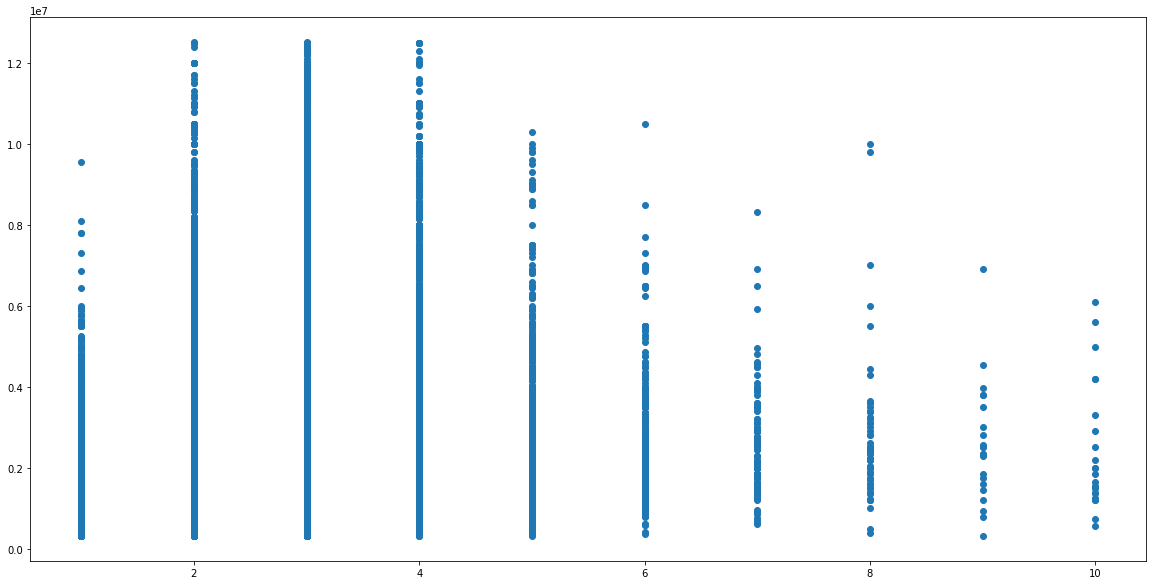

In [13]:
''' ¿El precio es proporcional a la cantidad de habitaciones?
'''

plt.figure(figsize = (20, 10))

# Declarás variables a graficar
x = dfl['CantHabitaciones']
y = dfl['Precio']

# Tipo de gráfico
plt.scatter(x, y)

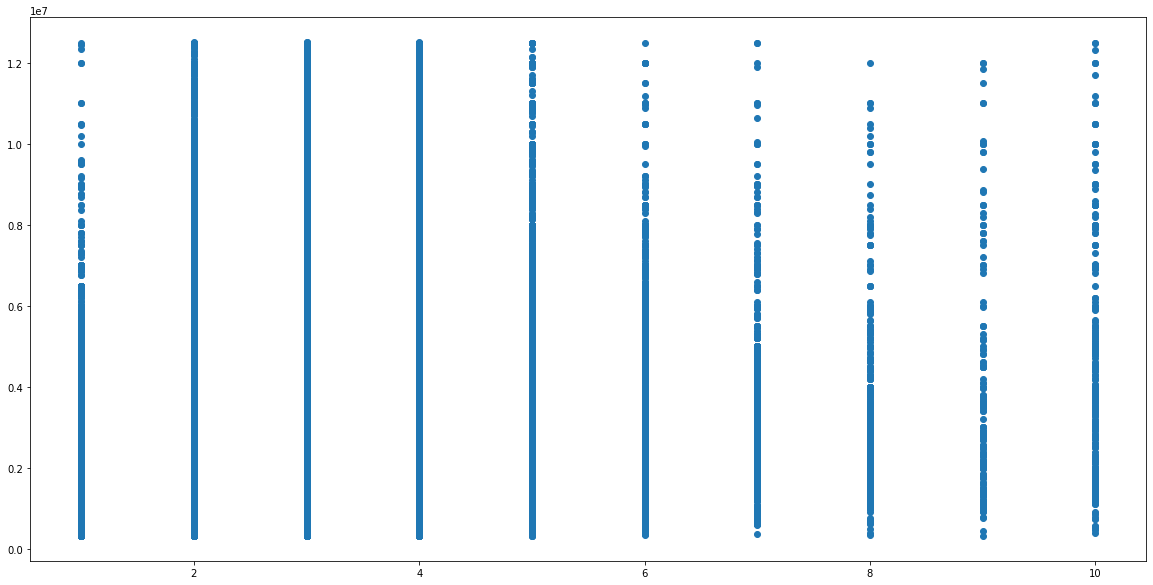

In [14]:
''' Con df...
'''

# Declarás variables a graficar
x = df['habitaciones']
y = df['precio']

plt.figure(figsize = (20, 10))

# Tipo de gráfico
plt.scatter(x, y)

In [15]:
pd.options.display.float_format = '{:_.3f}'.format
#pd.reset_option('float_format')
dfl.groupby('CantHabitaciones').mean()['Precio']

CantHabitaciones
1    1_766_076.947
2    1_481_899.601
3    2_426_461.407
4    2_852_660.607
5    2_559_617.799
6    2_590_063.863
7    2_542_642.202
8    2_809_855.273
9    2_579_545.455
10   2_420_434.783
Name: Precio, dtype: float64

In [16]:
dfl.groupby('CantHabitaciones').std()['Precio'] / pow(dfl.groupby('CantHabitaciones').count()['ID'], 1/2) #Aplicando De Moivre

CantHabitaciones
1     48_983.546
2     13_290.010
3     10_908.561
4     25_489.713
5     56_745.209
6     89_853.163
7    130_627.179
8    251_707.772
9    312_446.343
10   327_417.418
dtype: float64

In [17]:
print(dfl.groupby('CantHabitaciones').count()['ID'])

CantHabitaciones
1       924
2     13806
3     28187
4      5512
5       937
6       306
7       109
8        55
9        22
10       23
Name: ID, dtype: int64


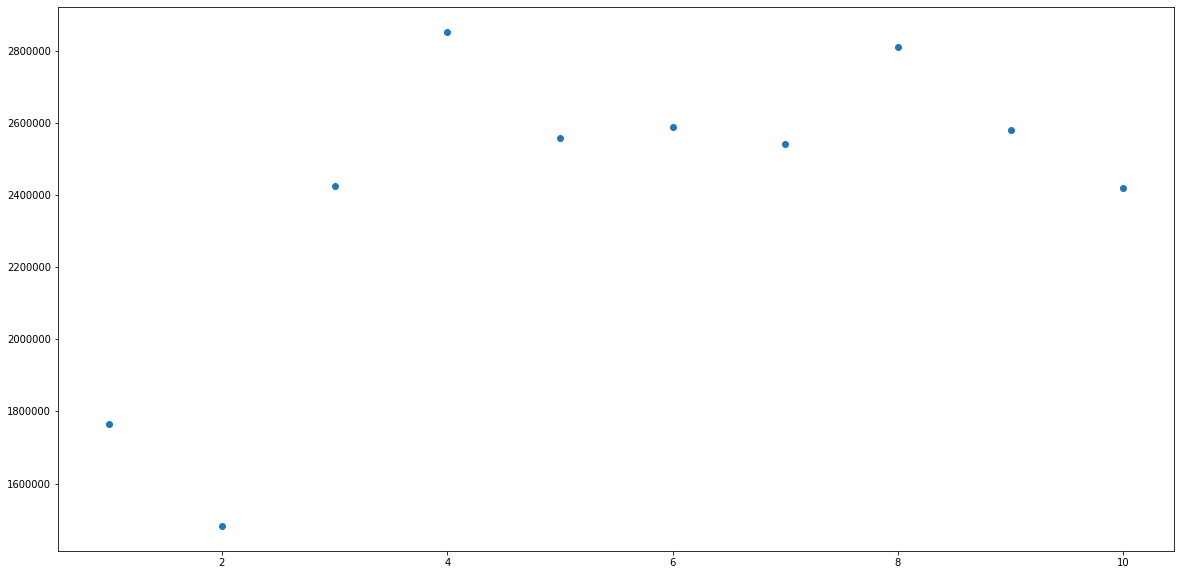

In [18]:
# Declarás variables a graficar
x = [1,2,3,4,5,6,7,8,9,10]
y = dfl.groupby('CantHabitaciones').mean()['Precio']

plt.figure(figsize = (20, 10))

# Tipo de gráfico
plt.scatter(x, y)

In [19]:
dfl['Precio'].sort_values()

28137       310000
75074       310000
239858      310000
80868       310000
109225      310000
            ...   
133771    12500000
127735    12500000
154383    12500000
192956    12516000
81715     12520000
Name: Precio, Length: 49881, dtype: uint32

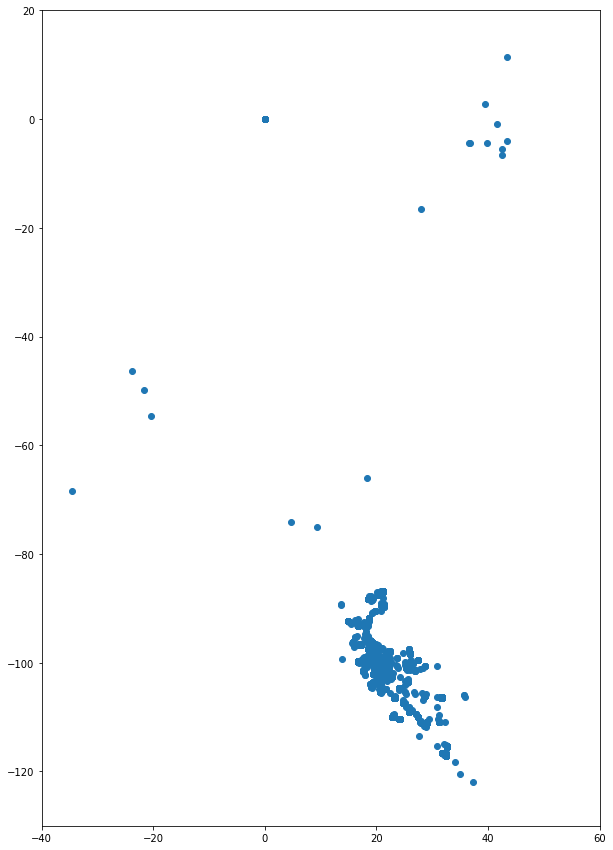

In [20]:
# Declarás variables a graficar
x = dfl['Latitud']
y = dfl['Longitud']

plt.figure(figsize = (10, 15))
plt.xlim([-40, 60])
plt.ylim([-130, 20])

# Tipo de gráfico
plt.scatter(x, y)